In [1]:
# imports; show all cols; format for 100,000

import pandas as pd
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 300)
pd.set_option("styler.format.thousands", ",")

import warnings
warnings.simplefilter(action = 'ignore', category = Warning)

# import data 
file = '/Users/compj/Documents/DATA/ALL_DATASETS/bees_0610.csv'
df = pd.read_csv(file, sep = ';')

# lowercase the column headings
df.columns = map(str.lower, df.columns)

# cast three string cols to datetime
df['created_at'] = df['created_at'].astype('datetime64[ns]')
df['modified_at'] = df['modified_at'].astype('datetime64[ns]')
df['spotted_at'] = df['spotted_at'].astype('datetime64[ns]')

In [2]:
def entries(start = '2020-04-29', stop = '2022-09-30'):
    
    """
    Takes values for time period in YYYY-MM-DD format (inclusive) and returns counts of bees by type
    """

    # what is the length (nb of observations) of the dataframe?
    total = len(df)
    
    # when was the latest observation in our dataset, regardless of the period being requested?
    latest = df.sort_values('created_at', ascending = False).iat[0, 8]
    latest_st = str(latest)[:10]

    # SEL filters the df for the required time period
    sel = df[(df.created_at >= start) & (df.created_at <= stop)]
    
    print('')
    print(f"For the period {start} to {stop}, there were {len(sel)} bees recorded.")
    
    print('')
    print(f"(The total number of records (since April 15, 2020) is {total}, as of {latest_st}).")
    
    print('')

    print('----------------------------')
    
    print('')
    
    # get a VC from the SEL df without 'other bee'
    main = sel[sel.bee_type != 'other bee']
    types = main.bee_type.value_counts()
    print('BEES BY TYPE IN THIS PERIOD')
    print(types.to_string())
    
    print('')
    
    # get a VC from the SEL df for 'other bee' column
    print('OTHER TYPES OF BEE IN THIS PERIOD')
    other_bees = sel.other_bee_type.value_counts()
    print(other_bees.to_string())
    
    print('')

    # get a count of how many 'other bees' didn't have an attempt at ID
    total_other = len(sel[sel.bee_type == 'other bee'])
    named_other = other_bees.sum()
    unid = total_other - named_other
    print(f'NO SUGGESTION FOR "OTHER TYPE OF BEE": {unid}')

    print('')
    
    # join and plot the two VCs
    df_types = pd.DataFrame(types)
    df_other_bees = pd.DataFrame(other_bees)
    df_other_bees.columns = ['bee_type']
    vc2 = pd.concat([df_types, df_other_bees], axis = 0)
    print(f'NUMBER OF BEES BY TYPE FOR {start} to {stop}: TOP 15')
    vc2.sort_values('bee_type', ascending = False).head(15).plot(kind = 'bar', figsize = (15, 5));
    
    return 

## January 2022


For the period 2022-01-01 to 2022-01-31, there were 108 bees recorded.

(The total number of records (since April 15, 2020) is 14699, as of 2022-10-04).

----------------------------

BEES BY TYPE IN THIS PERIOD
Honey bee                 7
Common carder bee         4
White tailed bumblebee    3
Early mining bumblebee    3
Buff tailed bumblebee     2

OTHER TYPES OF BEE IN THIS PERIOD
Bombus vestalis                              13
Hylaeus pictipes                             11
Lasioglossum morio                            7
Halictus scabiosae                            6
Dasypoda hirtipes                             5
Hylaeus spec.                                 5
Anthophora plumipes                           4
Andrena flavipes                              4
Andrena vaga                                  3
Heriades truncorum                            3
Megachile spec.                               3
Andrena dorsata                               3
Andrena haemorrhoa                  

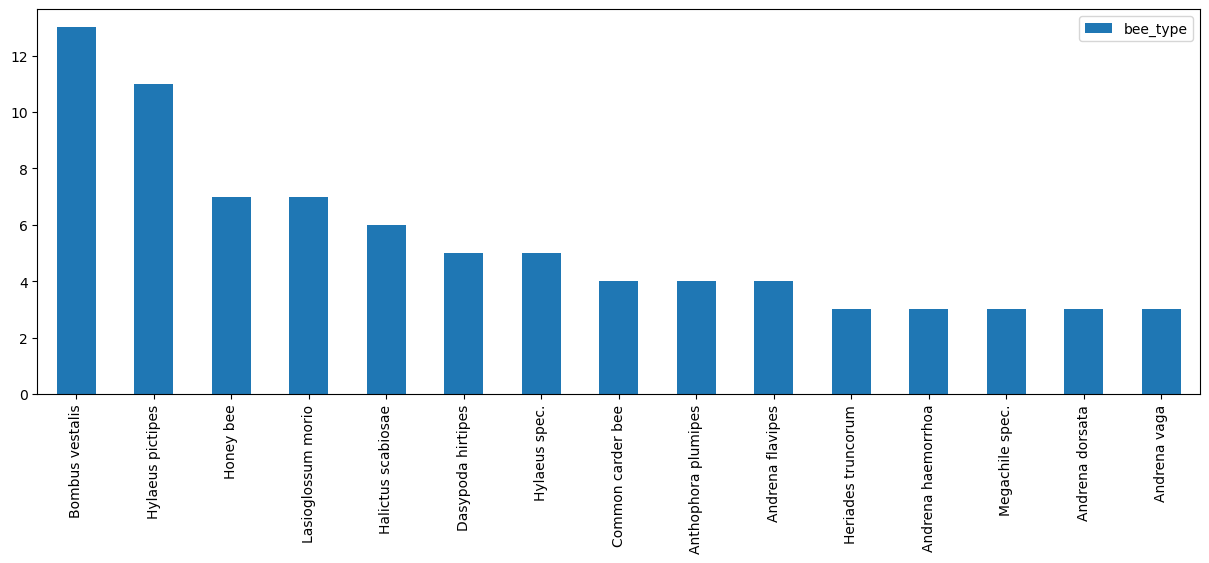

In [8]:
# return for January 2022

entries('2022-01-01', '2022-01-31')

## June 2022


For the period 2022-06-01 to 2022-06-30, there were 656 bees recorded.

(The total number of records (since April 15, 2020) is 14699, as of 2022-10-04).

----------------------------

BEES BY TYPE IN THIS PERIOD
Buff tailed bumblebee     130
Honey bee                 128
Common carder bee         109
White tailed bumblebee     47
Red tailed bumblebee       28
Small garden bumblebee     26
Leaf-cutter bee             2
Heath bumblebee             2
Red mason bee               1
Early mining bumblebee      1

OTHER TYPES OF BEE IN THIS PERIOD
Early bumblebee                        54
Tree bumblebee                         30
Anthophora quadrimaculata              15
Hylaeus hyalinatus                     11
Lasioglossum morio                      8
??                                      7
Hylaeus spec.                           6
Andrena dorsata                         5
Unsure                                  5
Megachile willughbiella                 5
Megachile spec.                 

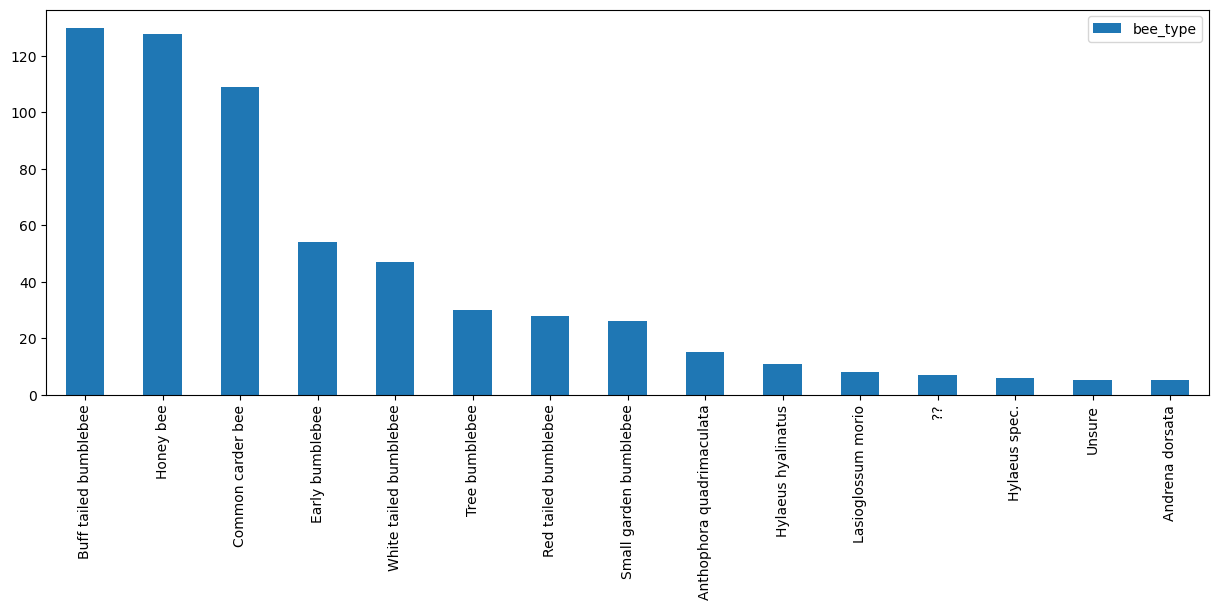

In [9]:
# return for June 2022

entries('2022-06-01', '2022-06-30')

## September 2022


For the period 2022-09-01 to 2022-09-30, there were 105 bees recorded.

(The total number of records (since April 15, 2020) is 14699, as of 2022-10-04).

----------------------------

BEES BY TYPE IN THIS PERIOD
Common carder bee         46
Honey bee                 26
Buff tailed bumblebee      9
White tailed bumblebee     1
Small garden bumblebee     1
Red mason bee              1

OTHER TYPES OF BEE IN THIS PERIOD
Colletes hederae         10
Small bee                 2
Ivy bee                   1
Lasioglossum sp.          1
Small unknown bee         1
Unsure                    1
Early bumblebee male      1
Hoverfly                  1
Early bumblebee queen     1
Solitary bee              1

NO SUGGESTION FOR "OTHER TYPE OF BEE": 1

NUMBER OF BEES BY TYPE FOR 2022-09-01 to 2022-09-30: TOP 15


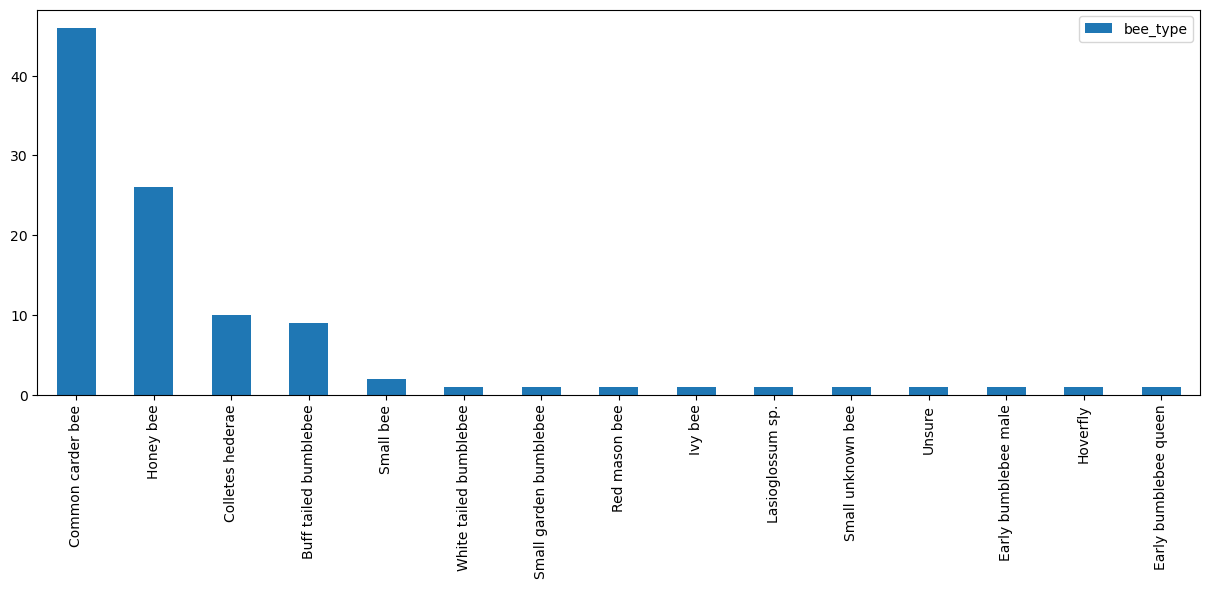

In [10]:
# return for September 2022

entries('2022-09-01', '2022-09-30')